# 00 - flights 데이터셋의 shpae와 head(5)

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
d = sb.load_dataset('flights')
print(f'flights 데이터셋의 shape : {d.shape}')
# d.head(5)
d.head()

flights 데이터셋의 shape : (144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 01 연도별 이용객 수 - groupby(), sum()

In [14]:
# data = d.groupby('year').sum('passengers')
data = d.groupby('year').sum(['passengers']).reset_index()
data

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


# 02 선그래프 - x축 연도값, y축 연간승객수

In [4]:
import matplotlib.pyplot as plt

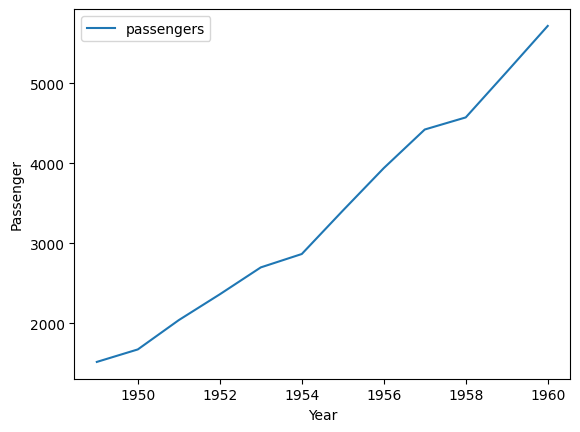

In [5]:
plt.plot(data['year'], data['passengers'], label='passengers')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Passenger')
plt.show()

# 03 점그래프 - scatter()

In [6]:
data

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


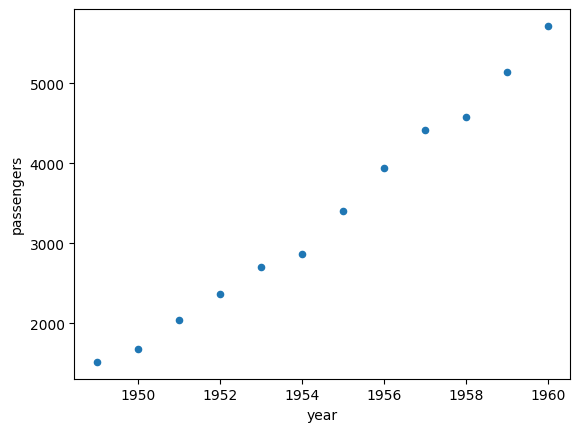

In [7]:
# data.plot(kind='scatter', x='year', y='passengers')
# plt.scatter(data['year'], data['passenger'])
data.plot(kind='scatter', x='year', y='passengers')
plt.show()

# 04 상관관계(선형회귀 모델의 계수와 절편)
### X = 연도, y = 승객수 / 단, X는 2차원 변환 필요

In [8]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [9]:
X = data[['year']]
X

,year
0,1949
1,1950
2,1951
3,1952
4,1953
5,1954
6,1955
7,1956
8,1957
9,1958


In [10]:
y = data['passengers']
y

0     1520
1     1676
2     2042
3     2364
4     2700
5     2867
6     3408
7     3939
8     4421
9     4572
10    5140
11    5714
Name: passengers, dtype: int64

In [11]:
regr.fit(X, y)
coef = regr.coef_
intercept = regr.intercept_
score = regr.score(X, y)
print(f'선형회귀 모델의 계수 : {coef}')
print(f'선형회귀 모델의 절편 : {intercept}')
print('데이터와 선형 회귀 직선의 관계점수 : {:.1%}'.format(score))
# print('y ={} * X + {:.2f}'.format(coef.round(2), intercept))
# print('추정몸무게', regr.predict([[167, 0], [167, 1]]))

선형회귀 모델의 계수 : [383.08741259]
선형회귀 모델의 절편 : -745380.7645687643
데이터와 선형 회귀 직선의 관계점수 : 98.7%


# 05 산점도 그래프+선형회귀 직선

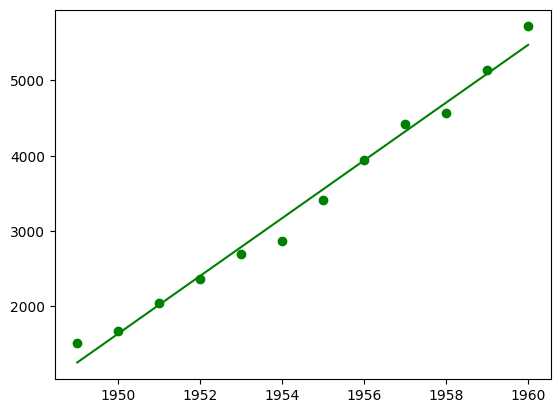

In [12]:
plt.scatter(X, y, color='g')
y_pred = regr.predict(X)
plt.plot(X, y_pred, 'g')
plt.show()